 # Linear Regression in Python

## Objective:
In this Jupyter Notebook, we will explore a fundamental machine-learning technique: Linear Regression. We will use Python's popular libraries such as NumPy, Matplotlib, and Scikit-Learn to demonstrate these techniques. The tutorial will include step-by-step explanations, code examples, and visualizations.

## Pre-requisites:

- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library Installation: Before getting started, ensure you have the following libraries installed. You can install them using pip if you haven't already:
    - NumPy: A library for numerical computations.
    - Matplotlib: A library for data visualization.
    - Pandas: A library for data manipulation and analysis.
    - Scikit-Learn: A machine learning library for various algorithms.
    - Seaborn: A library for data visualization.
    - Scipy: A library for statistical calculations.


To install, run the following commands:
"**!pip3 install numpy matplotlib pandas scikit-learn seaborn scipy**"

In [1]:
# Install necessary libraries
!pip3 install numpy matplotlib pandas scikit-learn seaborn scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

We import necessary libraries:

- pandas helps us pre-process the data
- numpy for numerical operations and scipy for statistical calculations.
- matplotlib.pyplot and sns for data visualization.
- train_test_split to split the dataset into training and testing sets.
- LinearRegression from Scikit-Learn for building the linear regression model.

### Load the Dataset

We'll start by loading the Boston Housing dataset.

The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The dataset has 506 observations and 14 variables. These variables provide valuable information about neighborhoods which can potentially influence the housing prices. The following columns:

- crim: Per capita crime rate by town.
- zn: Proportion of large residential lots (over 25,000 sq. ft.).
- indus: Proportion of non-retail business acres per town.
- Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
- nox: Concentration of nitrogen oxides in the air.
- rm: Average number of rooms per dwelling.
- age: Proportion of old owner-occupied units built before 1940.
- dis: Weighted distances to Boston employment centers.
- rad: Index of accessibility to radial highways.
- tax: Property tax rate per 10,000 USD.
- ptratio: Pupil-teacher ratio by town.
- b: This represents the proportion of blacks by town.
- lstat: Lower status of the population (percent).
- medv: Median value of owner-occupied homes in $1000s.

In [19]:
boston = pd.read_csv('HousingData.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [20]:
# Dimension of the dataset
print(np.shape(boston))

(506, 14)


### Exploratory Data Analysis

In [21]:
# Summary of the data to see the distribution of data
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

Two data columns show interesting summaries: 
- zn (Proportion of large residential lots (over 25,000 sq. ft.).) with 0 for 25th, and 50th percentiles. This variable is a conditional variable, which can explain why the summary shows 0 as the value for the first two quartiles.
- CHAS (Binary variable indicating if the property is near Charles River (1 for yes, 0 for no): With 0 for 25th, 50th, and 75th percentiles. This variable is a categorical variable which explains why the summary shows 0 as the value for the three quartiles.

#### Boxplots
Let's plot the dataset to see interesting trends and visualize the distribution of data.

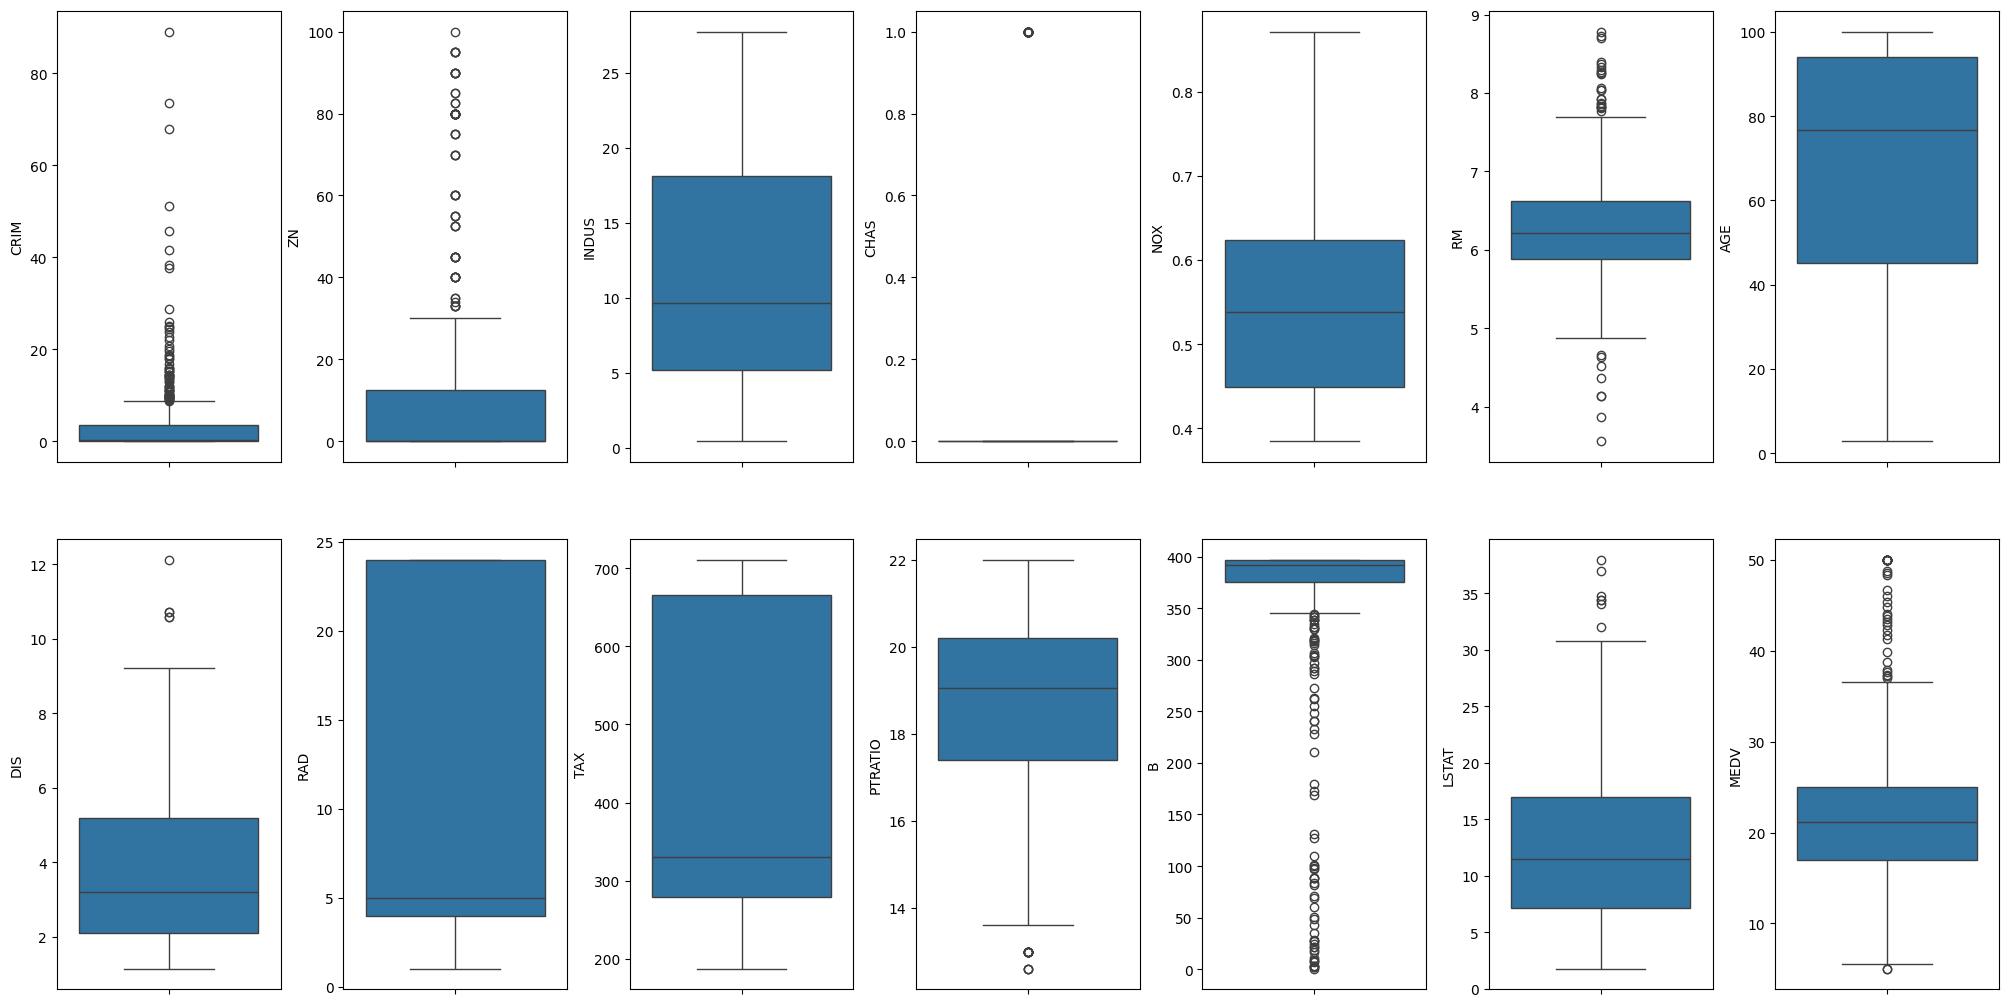

In [22]:
# Boxplots to visualize the distribution of data 

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We find that columns like **CRIM, zn, RM, and B** have outliers. Let's find out the percentage of outliers in every column.

In [23]:
# Percentage of outliers in every column

for k, v in boston.items():
        q1 = v.quantile(0.25) # calculate first quartile of the data
        q3 = v.quantile(0.75) # calculate third quartile of the data
        irq = q3 - q1         # calculate the interquartile range

# Identify outliers that fall below the threshold (q1 - 1.5 * irq) or above (q3 + 1.5 * irq) as per the IQR method
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0] # Calculate percentage

# Print the output
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.85%
Column ZN outliers = 12.45%
Column INDUS outliers = 0.00%
Column CHAS outliers = 96.05%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


The percentage of outliers for each column in the dataset:

- **CHAS** has 96.05% outliers, which means that most values in this column are considered outliers according to the IQR method.
- Columns like **INDUS," "NOX," "AGE," "RAD," and "TAX** have 0% outliers, indicating that no values in those columns are considered outliers.
- Columns have varying percentages of outliers, such as **CRIM** with 12.85% and **ZN** with 12.45%.

This analysis helps us identify which columns in the dataset have values that deviate significantly from the central tendency of the data, which can be useful for data quality assessment and data preprocessing. 

Also, let's remove the outliers in the **MEDV** column from the dataset to ensure that our analysis and visualization of the features is accurate.

In [24]:
# Remove outliers in the target variable

medv = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(medv))

(490, 14)


#### Histograms

Now lets plot the features as well as MEDV to view their distributions:

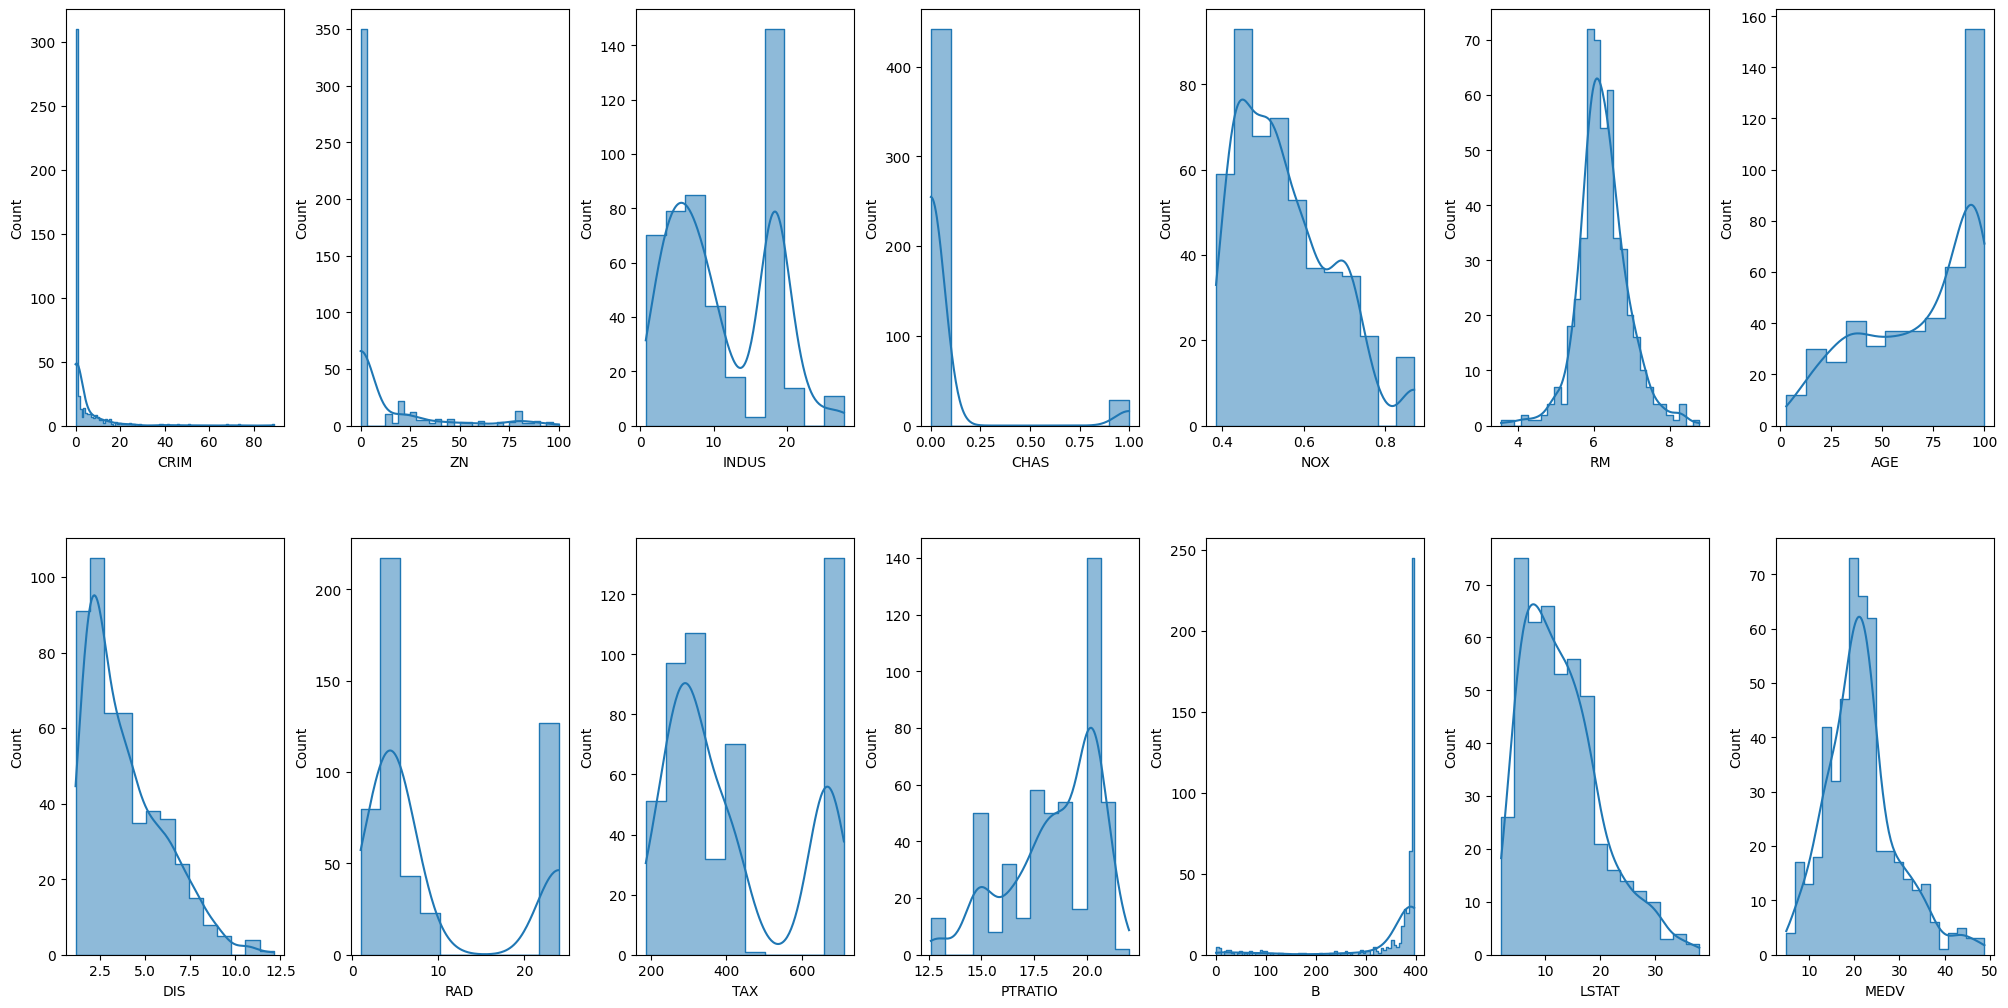

In [25]:
# Create a 2x7 grid of subplots (a total of 14 subplots) with specified dimensions.
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Initialize an index to keep track of the current subplot.
index = 0

# Flatten the 2D array of subplots into a 1D array for easier iteration.
axs = axs.flatten()

# Loop through each key-value pair in the 'medv'
for k, v in medv.items():
    # Create a histogram using Seaborn's histplot function.
    # 'v' represents the data for the current column.
    # 'axs[index]' specifies the current subplot where the histogram will be plotted.
    # 'element="step"' specifies the style of the histogram bars (a step plot).
    # 'kde=True' adds a kernel density estimate to the plot.
    sns.histplot(v, ax=axs[index], element="step", kde=True)

    # Increment the subplot index for the next iteration.
    index += 1

# Adjust the layout of the subplots to ensure they are properly spaced.
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Finally, display the figure with the histograms.

The histogram shows that: 
- Columns **CRIM, ZN, B** have highly skewed distributions.
- Also, **MEDV** shows a normal distribution (the predictions)
- Other columns seem to have a normal or bimodal distribution of data except CHAS (which is a discrete variable).

#### Correlation
Now let's plot the pairwise correlation on data.

<Axes: >

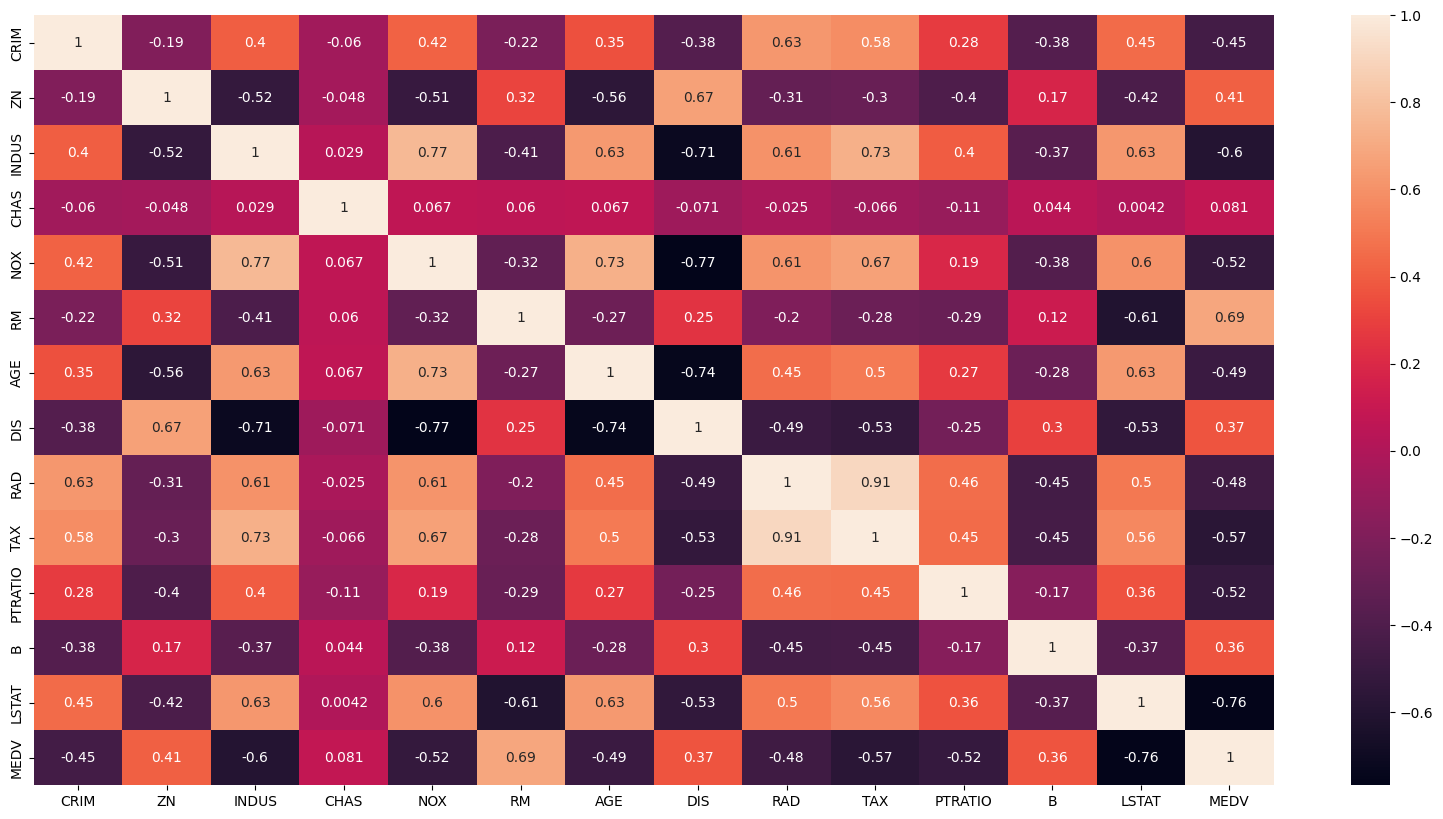

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(medv.corr(),  annot=True)

To fit a linear regression model, we select those features that have a high correlation with our target variable **MEDV**. From the correlation matrix, we learn that: 
- The columns **RM (0.69) and LSTAT (-0.76)** are highly correlated with our target variable MEDV. This indicates that they are strong predictors.
- Checking for multicollinearity: This refers to a situation where two or more independent variables in a regression model are highly correlated with each other, making it difficult to separate their individual effects on the dependent variable.
    -  **TAX and RAD** are features that are highly correlated to each other (0.91). We should not select both these features together for training the model.
    -  **DIS** and **AGE** have a correlation of -0.75, ergo same applies to them.

Let's visualise these variables against our target variable **MEDV**.

In [27]:
# Let's scale the columns and save them in the data frame 'x'

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['RM','LSTAT']
x = medv.loc[:,column_sels]
y = medv['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

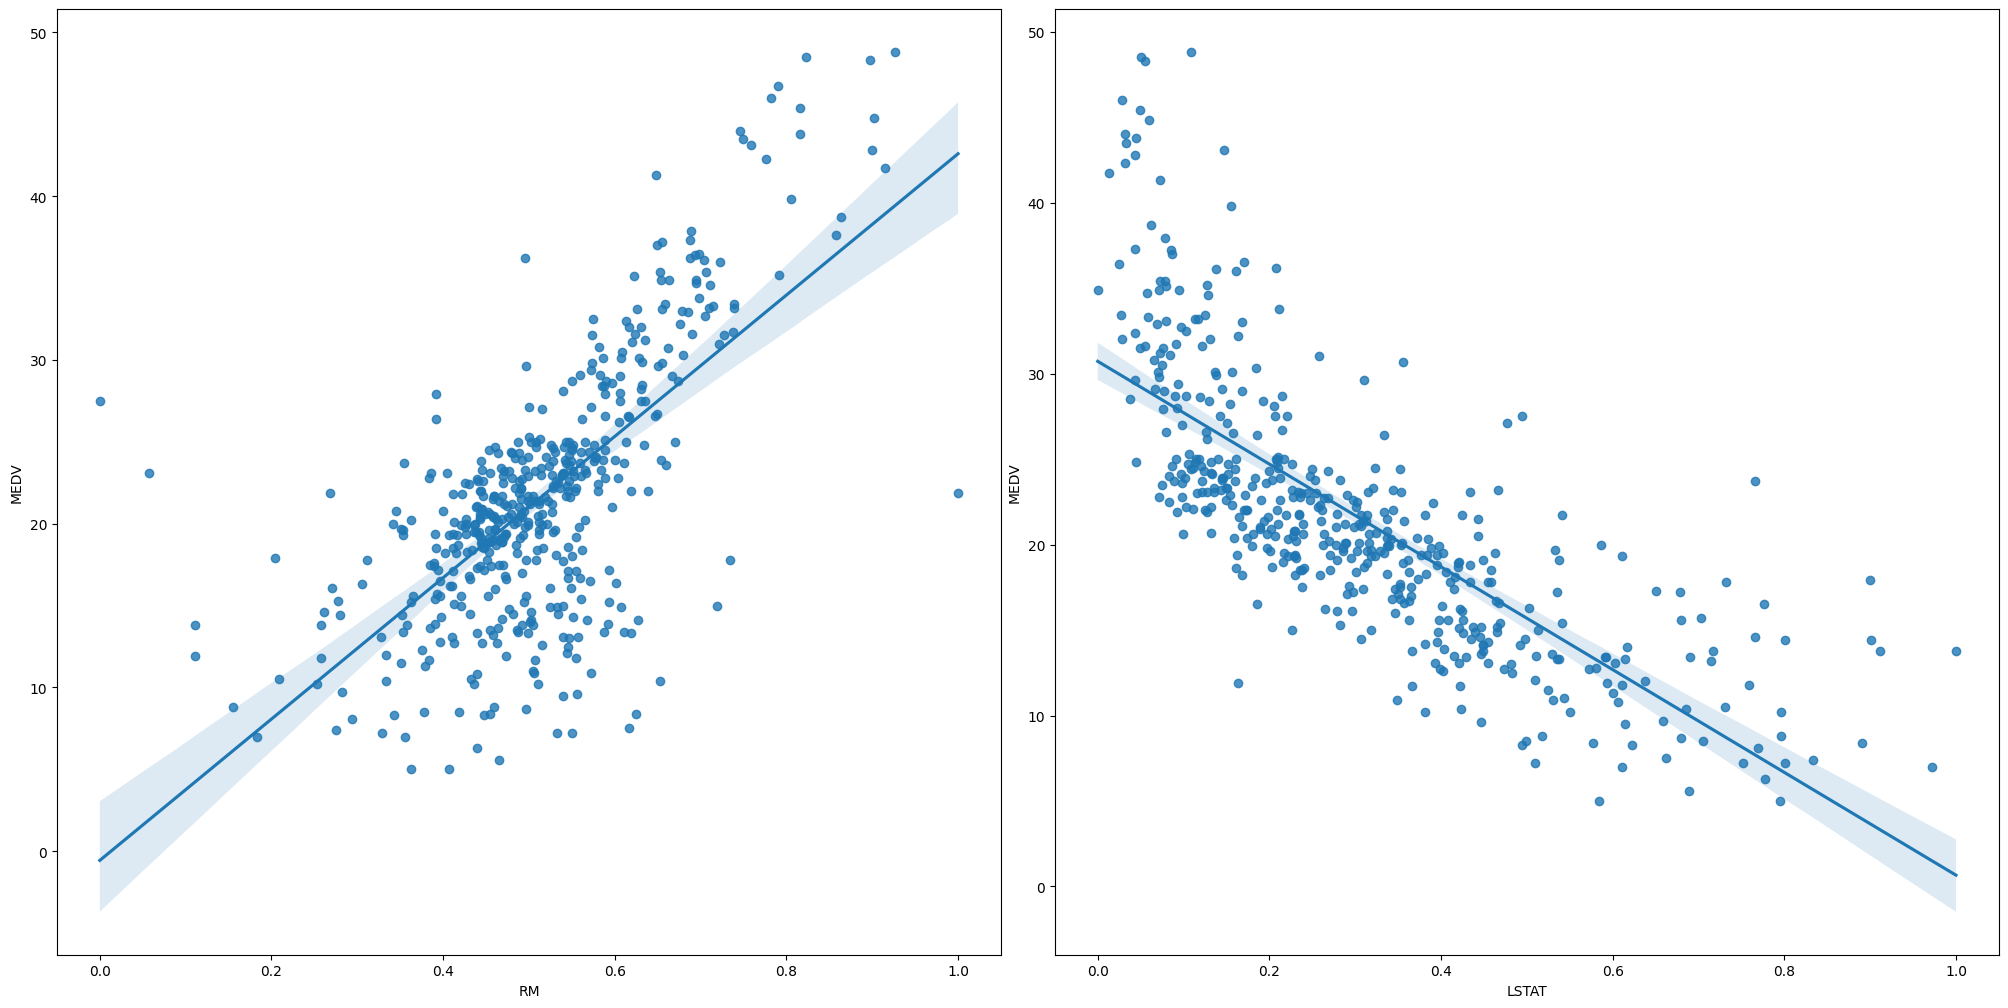

In [28]:
# Plot the dataset with scaled values against MEDV

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Upon visualizing we learn that: 
- The house price increases as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
- The house prices tend to decrease with an increase in LSTAT. Although it doesn’t follow exactly a linear line.

### Data Pre-processing 

In [29]:
# Handling missing values

# Create a DataFrame with the required features and target variable
medv_clean = medv[['RM', 'LSTAT','MEDV']].copy()

# Check for missing values
missing_values = medv_clean.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 RM        0
LSTAT    20
MEDV      0
dtype: int64


In [30]:
#Impute LSTAT NA values with the mean 

medv_clean['LSTAT'].fillna(medv_clean['LSTAT'].mean(), inplace=True)  # Fill with mean

In [31]:
# Check for missing values

missing_values = medv_clean.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 RM       0
LSTAT    0
MEDV     0
dtype: int64


 Our data values vary significantly in value. Let's try to remove the skewness of the data through log transformation.

In [32]:
# Separate the dependent variable (Y) and independent variables (X)
X = medv_clean.drop(columns=['MEDV'])
Y = medv_clean['MEDV']

In [33]:
# Apply log transformation to independent variables with skewness > 0.3
for col in X.columns:
    if np.abs(X[col].skew()) > 0.3:
        X[col] = np.log1p(X[col])

# Apply log transformation to the dependent variable (MEDV)
Y = np.log1p(Y)

Here, we first separate the dependent variable MEDV from the independent variables RM and LSTAT. Then, we apply the natural logarithm transformation to the columns in RM and LSTAT with skewness greater than 0.3. Finally, we also apply the natural logarithm transformation to the dependent variable Y. This code ensures that the transformation is applied correctly to the appropriate variables.

### Model Building and Evaluation

#### Splitting the data into training and testing sets

Now, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(392, 2)
(98, 2)
(392,)
(98,)


#### Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

#### Model evaluation
We will evaluate our model using RMSE and R2-score.

In [36]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.21984253100394702
R2 score is 0.6220795534282749


The model performance for testing set
--------------------------------------
RMSE is 0.18685588844212794
R2 score is 0.7488969236031853


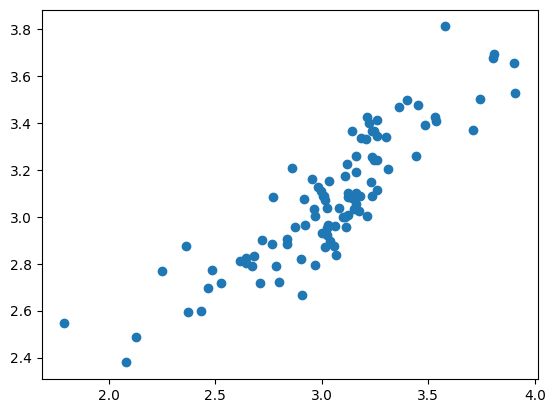

In [37]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

**Root Mean Squared Error (RMSE**):

For the training set, the RMSE is approximately 0.0136.
For the testing set, the RMSE is approximately 0.0123.

RMSE measures the average deviation of the model's predictions from the actual values. In both cases, the RMSE values are quite small, which suggests that your model's predictions are close to the actual target values. Smaller RMSE values indicate better model performance.

**R-squared (R2) Score**:

For the training set, the R2 score is approximately 0.5775.
For the testing set, the R2 score is approximately 0.6923.

R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Meaning, the R2 score measures how well the independent variables can predict the variation in the dependent variable. An R2 score closer to 1 indicates a better fit of the model to the data.

### Results: 

- The model performs better on the testing set compared to the training set, as indicated by a higher R2 score for the testing set. This is generally a good sign, as it suggests that the model generalizes well to new, unseen data (overfitting).
- The R2 score for the testing set (0.6923) indicates that approximately 69.23% of the variance in the dependent variable (the housing prices) can be explained by the independent variables in the model. This is a reasonably good fit, but there is still room for improvement. We can try techniques like, GradientBoosting, and Support Vector Regression (SVR) to improve our model's performance.
- Both RMSE values are very small, which suggests that the model's predictions are quite accurate. However, we should consider the scale of our target variable. If the scale had been very small (e.g., prices in dollars), then these RMSE values might be excellent. But the scale is large (1000s USD), so we should consider the error in the context of that scale.

In summary, the linear regression model appears to be performing reasonably well, with a good balance between training and testing set performance. There might be further room for improvement in explaining more variance in housing prices, but it's essential to consider the specific goals and context of your analysis.